<a href="https://colab.research.google.com/github/bluesoju/Deep-Nerual-Network-in-SC-Dection-Vuln/blob/main/Oscort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/SmartContract


/content/drive/MyDrive/SmartContract


In [ ]:
!source test_venv/bin/activate

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import train_test_split


## Import data 

In [ ]:
df = pd.read_csv("contract_labled.csv")
# df = pd.read_csv("contract_labled1.csv")
df = df.fillna(0)
shuffle(df)
data = df.values

#Trích xuất data và label
X = df.iloc[:,6:].values
y = df[['arithmetic', 'reentrancy', 'time_manipulation', 'TOD', 'tx_origin']].values

#nhãn 1, 0
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 21, test_size=0.2)



In [ ]:
# scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_test = sc.fit_transform(y_test)

## Xây dựng kiến trúc (Test_case)

Xây dựng các kiến trúc bên trong

In [ ]:
inputs = X_train[0].shape
inputs


NameError: ignored

In [ ]:
print(y_train[1].shape)

(5,)


In [ ]:
num_classes = y_train.shape[1]
num_classes

5

##Model1

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(inputs), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=150, batch_size=10)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               19383296  
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 19,531,397
Trainable params: 19,531,397


In [ ]:
test = model.fit(x = X_train, y = y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 2s 156ms/step - loss: 0.6830 - binary_accuracy: 0.7434 - val_loss: 0.5756 - val_binary_accuracy: 0.8692
Epoch 2/10
7/7 [==============================] - 1s 119ms/step - loss: 0.4906 - binary_accuracy: 0.8888 - val_loss: 0.3697 - val_binary_accuracy: 0.9308
Epoch 3/10
7/7 [==============================] - 1s 136ms/step - loss: 0.2202 - binary_accuracy: 0.9415 - val_loss: 0.5617 - val_binary_accuracy: 0.8808
Epoch 4/10
7/7 [==============================] - 1s 156ms/step - loss: 0.1694 - binary_accuracy: 0.9649 - val_loss: 0.7390 - val_binary_accuracy: 0.8923
Epoch 5/10
7/7 [==============================] - 1s 138ms/step - loss: 0.1258 - binary_accuracy: 0.9678 - val_loss: 0.5738 - val_binary_accuracy: 0.9077
Epoch 6/10
7/7 [==============================] - 1s 120ms/step - loss: 0.1316 - binary_accuracy: 0.9785 - val_loss: 0.4943 - val_binary_accuracy: 0.9154
Epoch 7/10
7/7 [==============================] - 1s 119ms/step - loss: 0.14

In [ ]:
y_pred = model.predict(X_test)

y_pred_class=model.predict(X_test) 
y_pred_class =np.argmax(y_pred_class ,axis=1)

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test)

print(y_pred_class)



2/2 [==============================] - 0s 25ms/step
[2 3 1 3 1 2 4 1 4 3 1 3 2 1 2 0 0 0 0 0 3 3 4 3 0 3 2 2 0 4 3 1 1 3 3 4 4
 3 1 0 0 0 4 0 0 2 1 3 1 1 0 1]


In [ ]:
print("  0  1  2  3  4")
print(y_test)

  0  1  2  3  4
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print('Model Loss: %.2f, Accuracy: %.2f' %((loss), (accuracy)))


Model Loss: 0.68, Accuracy: 0.92


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(matrix)

print("\n classification_report: ")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[ 9  0  0  1  0]
 [ 0 11  0  1  0]
 [ 1  0  5  1  0]
 [ 1  0  1 10  1]
 [ 2  1  1  0  6]]

 classification_report: 
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.92      0.92      0.92        12
           2       0.71      0.71      0.71         7
           3       0.77      0.77      0.77        13
           4       0.86      0.60      0.71        10

    accuracy                           0.79        52
   macro avg       0.79      0.78      0.78        52
weighted avg       0.80      0.79      0.79        52



TP: Dương tính thật
FP: Dương tính giả
TN: Âm tính thật
FN: là âm tính giả

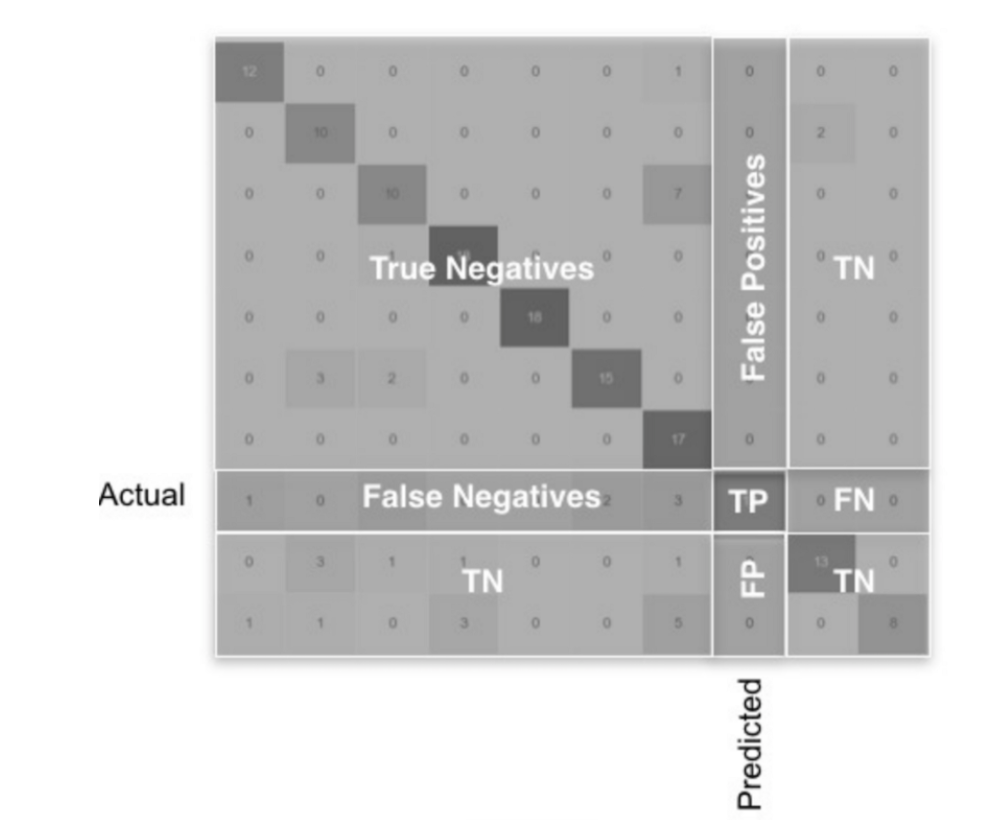

##Model 2

In [ ]:
from keras import optimizers
my_opt = optimizers.SGD(lr=0.01, decay=1e-5, nesterov=True)

In [ ]:
input_1 = X_train.shape
input_1

In [ ]:
#Design một mô hình tương tự GridSearch

In [ ]:
# from keras import Model
# model_1 = Model(inputs=input_1, outputs=predictions)

In [ ]:
#Design mo hinh

##Model 3

- Sigmoid nhận input là một số thực và output là (0, 1)
- Softmax thì các output > 0 và sum = 1
- Tanh cũng nhận đầu vào là một số thực và output (-1, 1)
- Relu sẽ lọc các giá trị < 0 ( relu sẽ nhan hơn tanh và sigmoid, tuy nhiên các giá trị input mà <0 qua relu sẽ >0 

- Về Dataset thì cột từ 1->6 là 5 lỗi thay vì bước one hot coding

